In [44]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from tqdm import tqdm
import matplotlib as mpl

np.random.seed(0)
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.usetex'] = False
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


d = 10
r = 0.04
s0 = K = 40
T = 1/2
# sigma = np.eye(d)
steps = 1000
dt = T/steps
paths = 100
sigma = np.random.rand(d, d)

100%|██████████| 999/999 [00:00<00:00, 30265.52it/s]


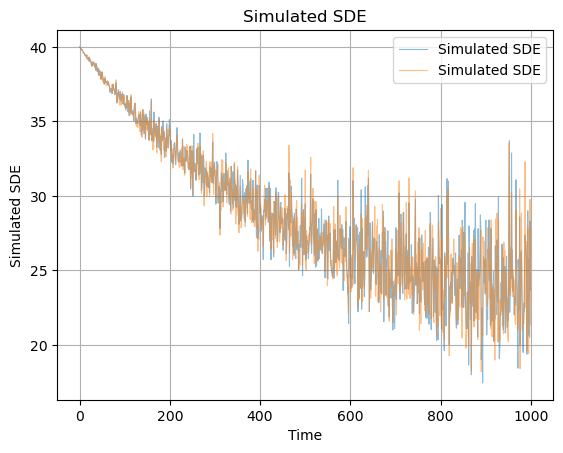

In [94]:
def monte_carlo(r, T, dt, sigma, s0, d, paths):
    X = np.zeros((int(T/dt), d, paths))
    X[0,:,:] = s0 
    
    steps = int(T/dt)
    sigma_s = (sigma**2).sum(axis=1).reshape(-1,1)
    for i in tqdm(range(1, steps)):
        t = i*dt
        W = np.random.normal(0, t, (d, paths))
        dW = sigma @ W
        # ic(W.shape, sigma.shape, dW.shape)
        X[i,:,:] = s0 * np.exp(r*t + dW)
        X[i,:,:] *= np.exp(-0.5 * sigma_s * t)
    return X




X = monte_carlo(r, T, dt, sigma, s0, d, paths)
Xav = X.mean(axis=1)
EXd = Xav.mean(axis=1)
#width of the plot half of standard
plt.plot(X.mean(axis=2)[:,:2], label='Simulated SDE', alpha=0.5, linewidth=0.8);
# plt.plot(EXd, 'k--', label='$S_{ad}$')
plt.xlabel('Time')
plt.ylabel('Simulated SDE')
plt.grid()
plt.legend()
plt.title('Simulated SDE')
plt.savefig('plots/sde.png')

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\alvis\AppData\Local\Temp\ipykernel_56532\3332885728.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(EXd, 'k--', label='$\Pi_{av}$')
C:\Users\alvis\AppData\Local\Temp\ipykernel_56532\3332885728.py:10: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('$\Pi_{av}$')
100%|██████████| 999/999 [00:00<00:00, 27752.75it/s]


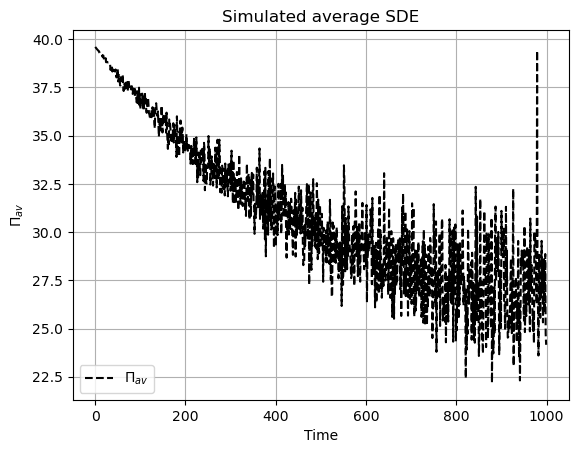

In [95]:
X = monte_carlo(r, T, dt, sigma, s0, d, paths)
Xav = X.mean(axis=1)
Xav[:,1] = np.maximum(Xav[:,1]- s0,0)

EXd = Xav.mean(axis=1)
tspace = np.linspace(0, T, steps)
EXd = EXd / np.exp(r*tspace)
plt.plot(EXd, 'k--', label='$\Pi_{av}$')
plt.xlabel('Time')
plt.ylabel('$\Pi_{av}$')
plt.grid()
plt.legend()
plt.title('Simulated average SDE')
plt.savefig('plots/monte_carlo.png')

In [74]:
EXds = []

for i in range(100):
    X = monte_carlo(r, T, dt, sigma, s0, d, paths)
    Xav = X.mean(axis=1)
    Xav[:,1] = np.maximum(Xav[:,1]- s0,0)

    EXd = Xav.mean(axis=1)
    EXds.append(EXd)
EXds = np.array(EXds)

100%|██████████| 999/999 [00:00<00:00, 25563.01it/s]


<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\alvis\AppData\Local\Temp\ipykernel_56532\2211484285.py:5: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(e_stat,  label='$\Pi_{av} + e_{stat}$')


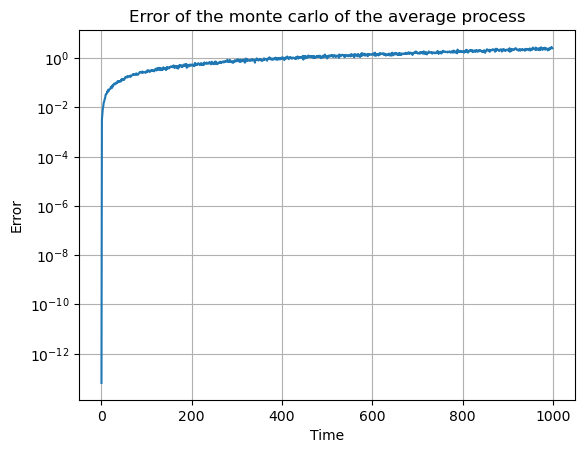

In [84]:
C_alpha = 1

e_stat = C_alpha * np.sqrt(np.var(EXds, axis=0))

plt.plot(e_stat,  label='$\Pi_{av} + e_{stat}$')
plt.yscale('log')
plt.ylabel('Error')
plt.xlabel('Time')
plt.grid()
plt.title('Error of the monte carlo of the average process')
plt.savefig('plots/error.png')
# e_stat